# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [9]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import time

from api_keys import weather_api_key
from citipy import citipy
from scipy import stats

In [2]:

#Casts a dataframe with two very long sets of random numbers formatted for use as random lat/long coordinates
cities_df = pd.DataFrame({"long":(np.random.uniform(-1.8,1.8,1200)*100), "lat":(np.random.uniform(-0.9,0.9,1200)*100)})

####
#### API SAVER FOR TESTING
####
#cities_df = cities_df.truncate(after = 59)


cities_df.head()

#city = citipy.nearest_city(22.99,120.21)
#city.country_code

,long,lat
0,128.379756,-64.324089
1,59.195332,-13.702434
2,-179.062223,8.913796
3,-84.255361,-86.054528
4,9.199472,29.322843


## Generate Cities List

In [3]:
cities_name = []
countrycode = []
for i in range(0,len(cities_df['lat'])):
    
    #API saver for testing
    #if i>60:
        #break
    
    
    lat = cities_df.iloc[i]['lat']
    long = cities_df.iloc[i]['long']
    city = citipy.nearest_city(lat,long)
    
    name = city.city_name
    cities_name.append(name)
    country = city.country_code
    countrycode.append(country)
    
cities_df['City'] = cities_name
cities_df['Country'] = countrycode
cities_df.head(10)

,long,lat,City,Country
0,128.379756,-64.324089,new norfolk,au
1,59.195332,-13.702434,cap malheureux,mu
2,-179.062223,8.913796,vaitupu,wf
3,-84.255361,-86.054528,ushuaia,ar
4,9.199472,29.322843,nalut,ly
5,53.140293,22.431181,abu dhabi,ae
6,-77.613204,73.316303,qaanaaq,gl
7,154.061403,-57.892463,hobart,au
8,-85.118468,-5.428326,talara,pe
9,172.104112,-6.313252,lolua,tv


In [4]:
#drop duplicate cities in cities_df
cities_copy = cities_df.copy()
new_cities = cities_copy.drop_duplicates("City", keep = 'first')

#reset cities_df's index and truncate at 499 to provide sample size of 500 random cities.
new_cities = new_cities.reset_index(drop = True)
new_cities = new_cities.truncate( after=499)
new_cities

,long,lat,City,Country
0,128.379756,-64.324089,new norfolk,au
1,59.195332,-13.702434,cap malheureux,mu
2,-179.062223,8.913796,vaitupu,wf
3,-84.255361,-86.054528,ushuaia,ar
4,9.199472,29.322843,nalut,ly
...,...,...,...,...
495,179.187869,-50.011217,christchurch,nz
496,38.746392,52.649579,donskoye,ru
497,13.833985,-1.227258,lekoni,ga
498,-65.259670,38.322374,shelburne,ca


In [5]:
api_key = weather_api_key


#Establish columns for data to be used in scatter plots
new_cities["Temp"]=""
new_cities["Humidity"]=""
new_cities["Cloudiness"]=""
new_cities["Wind (mph)"]=""
new_cities

,long,lat,City,Country,Temp,Humidity,Cloudiness,Wind (mph)
0,128.379756,-64.324089,new norfolk,au,,,,
1,59.195332,-13.702434,cap malheureux,mu,,,,
2,-179.062223,8.913796,vaitupu,wf,,,,
3,-84.255361,-86.054528,ushuaia,ar,,,,
4,9.199472,29.322843,nalut,ly,,,,
...,...,...,...,...,...,...,...,...
495,179.187869,-50.011217,christchurch,nz,,,,
496,38.746392,52.649579,donskoye,ru,,,,
497,13.833985,-1.227258,lekoni,ga,,,,
498,-65.259670,38.322374,shelburne,ca,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
#Use iterrows() to loop through the new_cities sample size and perform API calls for each 

In [7]:
#Test API print/block status

target_url=f"http://api.openweathermap.org/data/2.5/weather?q={new_cities.City[4]}&appid={weather_api_key}"
weather_json = requests.get(target_url).json()
print(weather_json)


{'coord': {'lon': 10.85, 'lat': 30.33}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 297.84, 'feels_like': 294.46, 'temp_min': 297.84, 'temp_max': 297.84, 'pressure': 1017, 'humidity': 53, 'sea_level': 1017, 'grnd_level': 959}, 'visibility': 10000, 'wind': {'speed': 6.86, 'deg': 26}, 'clouds': {'all': 82}, 'dt': 1600197138, 'sys': {'country': 'LY', 'sunrise': 1600146076, 'sunset': 1600190543}, 'timezone': 7200, 'id': 2214432, 'name': 'Nālūt', 'cod': 200}


In [10]:
temp_list = []
humid_list = []
cloud_list = []
wind_list = []

for index, row in new_cities.iterrows():
    
    #just put into the loop this:  time.sleep(1)  that will restrict the requests to 1 per second,
    #which is the max allowed by free subscription. 
    time.sleep(1)
    #API saver
    #if index>60:
        #break
    
    target_url=f"http://api.openweathermap.org/data/2.5/weather?q={row[2]}&appid={weather_api_key}"
    weather_json = requests.get(target_url).json()
    print(f"Processing Record {index} | {row[2]}")
    
    try:
        temp_list.append(weather_json["main"]["temp"])
        humid_list.append(weather_json["main"]["humidity"])
        cloud_list.append(weather_json["clouds"]["all"])
        wind_list.append(weather_json["wind"]["speed"])
        
        #add in list appends here for Humidity, Cloudiness, and Wind (mph)
      
        
    except:
        temp_list.append("")
        humid_list.append("")
        cloud_list.append("")
        wind_list.append("")
        print("City not found. Skipping...")

Processing Record 0 | new norfolk
Processing Record 1 | cap malheureux
Processing Record 2 | vaitupu
City not found. Skipping...
Processing Record 3 | ushuaia
Processing Record 4 | nalut
Processing Record 5 | abu dhabi
Processing Record 6 | qaanaaq
Processing Record 7 | hobart
Processing Record 8 | talara
Processing Record 9 | lolua
City not found. Skipping...
Processing Record 10 | puerto ayora
Processing Record 11 | cape town
Processing Record 12 | kamenka
Processing Record 13 | sorvag
City not found. Skipping...
Processing Record 14 | ribeira grande
Processing Record 15 | upernavik
Processing Record 16 | cherskiy
Processing Record 17 | portage
Processing Record 18 | avarua
Processing Record 19 | butaritari
Processing Record 20 | tevaitoa
Processing Record 21 | saint-philippe
Processing Record 22 | bonavista
Processing Record 23 | barra do garcas
Processing Record 24 | rikitea
Processing Record 25 | barrow
Processing Record 26 | mount gambier
Processing Record 27 | yablonovo
Processi

Processing Record 227 | belyy yar
Processing Record 228 | tiksi
Processing Record 229 | port augusta
Processing Record 230 | ossora
Processing Record 231 | buin
Processing Record 232 | sokolo
Processing Record 233 | zeya
Processing Record 234 | bathsheba
Processing Record 235 | saint-augustin
Processing Record 236 | manakara
Processing Record 237 | aflu
City not found. Skipping...
Processing Record 238 | birao
Processing Record 239 | saleaula
City not found. Skipping...
Processing Record 240 | okhotsk
Processing Record 241 | khatanga
Processing Record 242 | palu
Processing Record 243 | haapu
City not found. Skipping...
Processing Record 244 | lingao
Processing Record 245 | paytug
City not found. Skipping...
Processing Record 246 | mitsamiouli
Processing Record 247 | grindavik
Processing Record 248 | toliary
City not found. Skipping...
Processing Record 249 | sao joao da barra
Processing Record 250 | roros
Processing Record 251 | yabrud
Processing Record 252 | kailua
Processing Record 2

Processing Record 458 | pierre
Processing Record 459 | tuatapere
Processing Record 460 | bolshiye uki
City not found. Skipping...
Processing Record 461 | jonesboro
Processing Record 462 | ayagoz
Processing Record 463 | vostok
Processing Record 464 | antalaha
Processing Record 465 | czestochowa
Processing Record 466 | petropavlovsk-kamchatskiy
Processing Record 467 | nandyal
Processing Record 468 | lorengau
Processing Record 469 | senador jose porfirio
Processing Record 470 | banjar
Processing Record 471 | nguiu
City not found. Skipping...
Processing Record 472 | nome
Processing Record 473 | westpunt
City not found. Skipping...
Processing Record 474 | ughelli
Processing Record 475 | chingola
Processing Record 476 | dukat
Processing Record 477 | yaan
Processing Record 478 | barstow
Processing Record 479 | carauari
Processing Record 480 | pangody
Processing Record 481 | ijaki
City not found. Skipping...
Processing Record 482 | bur gabo
City not found. Skipping...
Processing Record 483 | k

In [11]:
print(len(temp_list))
print(len(new_cities["Temp"]))

500
500


In [12]:
new_cities["Temp"] = temp_list
new_cities["Humidity"] = humid_list
new_cities["Cloudiness"] = cloud_list
new_cities["Wind (mph)"] = wind_list


#print(len(temp_list))
 

def kelv_to_fahr(temp_kelv):
    """Convert Kelvin to Fahrenheit
    
    Return Fahrenheit conversion of input"""
    
    temp_fahr = (temp_kelv)* 9/5 - 459.67
    return temp_fahr


#converts the strings to numbers so they can be formatted into fahrenheit
#new_cities.dropna() to get rid of the empty variables where data was lacking
#or do a reverse loc statement, removing all that has this characteristic - "NaN" or "" 
#before numericization

#To remove all rows where column 'score' is < 50:
#df = df.drop(df[df.score < 50].index)
new_cities = new_cities.drop(new_cities[new_cities.Temp == ""].index)

new_cities = new_cities.reset_index(drop = True)
new_cities["Temp"] = pd.to_numeric(new_cities["Temp"])
new_cities["Temp"] = kelv_to_fahr(new_cities["Temp"])



new_cities

,long,lat,City,Country,Temp,Humidity,Cloudiness,Wind (mph)
0,128.379756,-64.324089,new norfolk,au,45.968,70,100,2.19
1,59.195332,-13.702434,cap malheureux,mu,64.004,82,92,0.89
2,-84.255361,-86.054528,ushuaia,ar,35.600,80,75,10.3
3,9.199472,29.322843,nalut,ly,76.442,53,82,6.86
4,53.140293,22.431181,abu dhabi,ae,89.600,75,1,2.6
...,...,...,...,...,...,...,...,...
442,179.187869,-50.011217,christchurch,nz,36.446,74,0,1
443,38.746392,52.649579,donskoye,ru,66.200,37,0,3
444,13.833985,-1.227258,lekoni,ga,77.036,78,100,2.92
445,-65.259670,38.322374,shelburne,ca,66.308,49,20,6.7


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
#export dataframe as csv
#new_cities is a whole set of data, cleaned up, populated, and sorted together. Any missing cities have been pruned out.
#This is the time to save the dataset to a csv for file output. Everything after here will use copies of new_cities or 
#changes to it.

#export save as csv etc
new_cities.to_csv('WeatherPy-SampleCities.csv')
new_cities.head()

,long,lat,City,Country,Temp,Humidity,Cloudiness,Wind (mph)
0,128.379756,-64.324089,new norfolk,au,45.968,70,100,2.19
1,59.195332,-13.702434,cap malheureux,mu,64.004,82,92,0.89
2,-84.255361,-86.054528,ushuaia,ar,35.600,80,75,10.3
3,9.199472,29.322843,nalut,ly,76.442,53,82,6.86
4,53.140293,22.431181,abu dhabi,ae,89.600,75,1,2.6


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
#To remove all rows where column 'score' is < 50:
#df = df.drop(df[df.score < 50].index)

new_cities = new_cities.drop(new_cities[new_cities.Humidity > 100].index)
new_cities.head()

,long,lat,City,Country,Temp,Humidity,Cloudiness,Wind (mph)
0,128.379756,-64.324089,new norfolk,au,45.968,70,100,2.19
1,59.195332,-13.702434,cap malheureux,mu,64.004,82,92,0.89
2,-84.255361,-86.054528,ushuaia,ar,35.600,80,75,10.3
3,9.199472,29.322843,nalut,ly,76.442,53,82,6.86
4,53.140293,22.431181,abu dhabi,ae,89.600,75,1,2.6


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

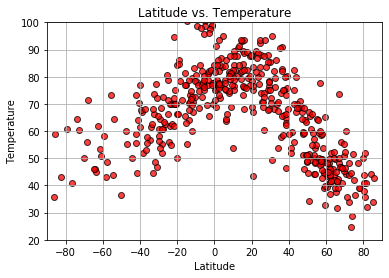

<Figure size 432x288 with 0 Axes>

In [15]:
#plt.scatter(x,y,other this and that)
x_axis = new_cities["lat"]
data = new_cities["Temp"]

plt.scatter(x_axis,data,marker="o",facecolors="red",edgecolors="black", alpha=0.75)
# Generate latitudes(-90 to 90) 
plt.title("Latitude vs. Temperature")
plt.xlim(-90,90)
plt.ylim(20,100)
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid(True)
plt.show()

#save as png
plt.savefig("LatvsTemp.png")

## Latitude vs. Humidity Plot

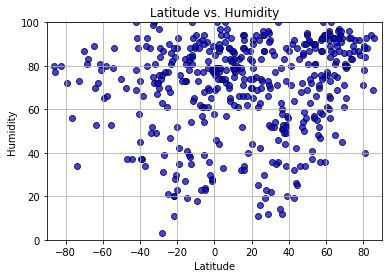

<Figure size 432x288 with 0 Axes>

In [16]:
#plt.scatter(x,y,other this and that)
x_axis = new_cities["lat"]
data = new_cities["Humidity"]

plt.scatter(x_axis,data,marker="o",facecolors="blue",edgecolors="black", alpha=0.75)
# Generate latitudes(-90 to 90) 
plt.title("Latitude vs. Humidity")
plt.xlim(-90,90)
plt.ylim(0,100)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)
plt.show()

#save as png
plt.savefig("LatvsHum.png")

## Latitude vs. Cloudiness Plot

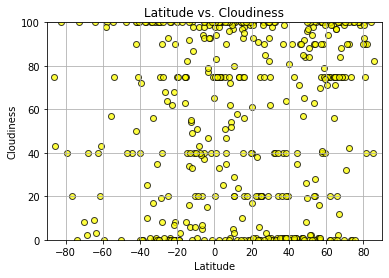

<Figure size 432x288 with 0 Axes>

In [17]:
#plt.scatter(x,y,other this and that)
x_axis = new_cities["lat"]
data = new_cities["Cloudiness"]

plt.scatter(x_axis,data,marker="o",facecolors="yellow",edgecolors="black", alpha=0.75)
# Generate latitudes(-90 to 90) 
plt.title("Latitude vs. Cloudiness")
plt.xlim(-90,90)
plt.ylim(0,100)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
plt.show()

#save as png
plt.savefig("LatvsCloud.png")

## Latitude vs. Wind Speed Plot

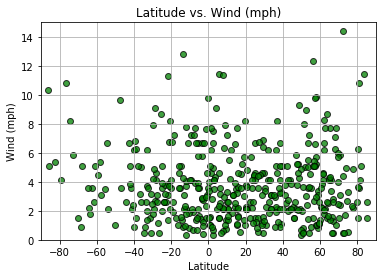

<Figure size 432x288 with 0 Axes>

In [18]:
#plt.scatter(x,y,other this and that)
x_axis = new_cities["lat"]
data = new_cities["Wind (mph)"]

plt.scatter(x_axis,data,marker="o",facecolors="green",edgecolors="black", alpha=0.75)
# Generate latitudes(-90 to 90) 
plt.title("Latitude vs. Wind (mph)")
plt.xlim(-90,90)
plt.ylim(0,15)
plt.xlabel("Latitude")
plt.ylabel("Wind (mph)")
plt.grid(True)
plt.show()

#save as png
plt.savefig("LatvsWind.png")

## Linear Regression

In [19]:
#Exactly as above, but need to create two new DFs - north and south - and then just run all the same graphs out of them. Easy.

In [20]:
# split the dataframe into two dataframes, North and South
# Your second requirement is to run linear regression on 
# each relationship, only this time separating them into 
# Northern Hemisphere (greater than or equal to 0 degrees 
# latitude) and Southern Hemisphere (less than 0 degrees latitude):

#To remove all rows where column 'score' is < 50:
#df = df.drop(df[df.score < 50].index)

south_df = new_cities.copy()
south_df = south_df.drop(south_df[south_df.lat >= 0].index)
south_df

,long,lat,City,Country,Temp,Humidity,Cloudiness,Wind (mph)
0,128.379756,-64.324089,new norfolk,au,45.968,70,100,2.19
1,59.195332,-13.702434,cap malheureux,mu,64.004,82,92,0.89
2,-84.255361,-86.054528,ushuaia,ar,35.600,80,75,10.3
6,154.061403,-57.892463,hobart,au,48.542,66,100,3.1
7,-85.118468,-5.428326,talara,pe,77.000,61,37,6.7
...,...,...,...,...,...,...,...,...
430,-67.276031,-5.895862,carauari,br,95.720,39,98,0.65
432,156.311506,-5.426795,kieta,pg,76.046,90,100,5.75
442,179.187869,-50.011217,christchurch,nz,36.446,74,0,1
444,13.833985,-1.227258,lekoni,ga,77.036,78,100,2.92


In [21]:
north_df = new_cities.copy()
north_df = north_df.drop(north_df[north_df.lat <= 0].index)
north_df

,long,lat,City,Country,Temp,Humidity,Cloudiness,Wind (mph)
3,9.199472,29.322843,nalut,ly,76.442,53,82,6.86
4,53.140293,22.431181,abu dhabi,ae,89.600,75,1,2.6
5,-77.613204,73.316303,qaanaaq,gl,24.656,83,0,1.69
10,43.743904,70.944774,kamenka,ru,60.008,65,100,5.83
11,-31.038701,32.242438,ribeira grande,pt,68.000,52,40,4.1
...,...,...,...,...,...,...,...,...
439,46.109680,65.210374,leshukonskoye,ru,44.780,91,97,4.3
440,-67.344520,38.589221,nantucket,us,62.348,52,1,5.1
441,8.740751,66.853345,sistranda,no,50.000,87,75,2.6
443,38.746392,52.649579,donskoye,ru,66.200,37,0,3


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

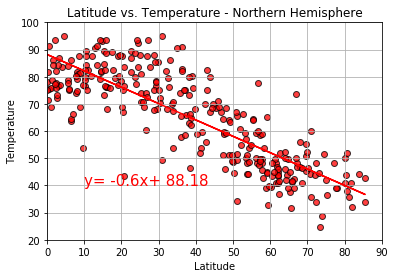

<Figure size 432x288 with 0 Axes>

In [22]:
#plt.scatter(x,y,other this and that)
x_axis = north_df["lat"]
data = north_df["Temp"]

plt.scatter(x_axis,data,marker="o",facecolors="red",edgecolors="black", alpha=0.75)
# Generate latitudes(-90 to 90) 
plt.title("Latitude vs. Temperature - Northern Hemisphere")
plt.xlim(0,90)
plt.ylim(20,100)
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid(True)
##add regression

## REGRESSION

(slope, intercept, rvalue, pvalue, stderr)=stats.linregress(x_axis,data)
regress_values = x_axis*slope+intercept
line_eq="y= "+ str(round(slope,2))+"x+ " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.show()

#save as png
plt.savefig("LatvsTempNorth.png")

In [23]:
#ANALYSIS: As latitude goes up, temperature goes down. IE: It gets colder further from the equator.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

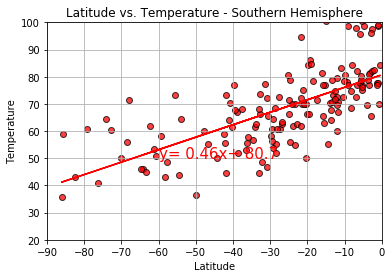

<Figure size 432x288 with 0 Axes>

In [24]:
#plt.scatter(x,y,other this and that)
x_axis = south_df["lat"]
data = south_df["Temp"]

plt.scatter(x_axis,data,marker="o",facecolors="red",edgecolors="black", alpha=0.75)
# Generate latitudes(-90 to 90) 
plt.title("Latitude vs. Temperature - Southern Hemisphere")
plt.xlim(-90,0)
plt.ylim(20,100)
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid(True)

##add regression

## REGRESSION

(slope, intercept, rvalue, pvalue, stderr)=stats.linregress(x_axis,data)
regress_values = x_axis*slope+intercept
line_eq="y= "+ str(round(slope,2))+"x+ " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-60,50),fontsize=15,color="red")
plt.show()

#save as png
plt.savefig("LatvsTempSouth.png")

In [25]:
#ANALYSIS: The lower the latitude past the equator, the colder the temperature gets again. This proves that it is
#hotter at the equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

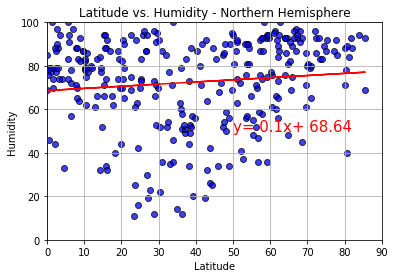

<Figure size 432x288 with 0 Axes>

In [26]:
#plt.scatter(x,y,other this and that)
x_axis = north_df["lat"]
data = north_df["Humidity"]

data = data.astype(float)

plt.scatter(x_axis,data,marker="o",facecolors="blue",edgecolors="black", alpha=0.75)
# Generate latitudes(-90 to 90) 
plt.title("Latitude vs. Humidity - Northern Hemisphere")
plt.xlim(0,90)
plt.ylim(0,100)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

##add regression
#np.cov(label0.astype(float), rowvar=False)

## REGRESSION

(slope, intercept, rvalue, pvalue, stderr)=stats.linregress(x_axis,data)
regress_values = x_axis*slope+intercept
line_eq="y= "+ str(round(slope,2))+"x+ " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(50,50),fontsize=15,color="red")
plt.show()

#save as png
plt.savefig("LatvsHumNorth.png")

In [27]:
#ANALYSIS: There is only a slight increase in humidity with latitude. 
#This suggests that there is a weak connection between the two.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

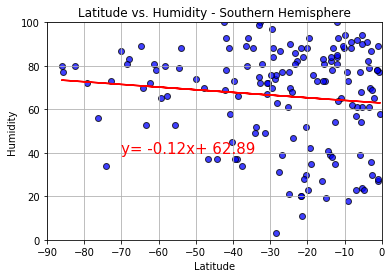

<Figure size 432x288 with 0 Axes>

In [28]:
#plt.scatter(x,y,other this and that)
x_axis = south_df["lat"]
data = south_df["Humidity"]
data = data.astype(float)

plt.scatter(x_axis,data,marker="o",facecolors="blue",edgecolors="black", alpha=0.75)
# Generate latitudes(-90 to 90) 
plt.title("Latitude vs. Humidity - Southern Hemisphere")
plt.xlim(-90,0)
plt.ylim(0,100)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)
##add regression

## REGRESSION

(slope, intercept, rvalue, pvalue, stderr)=stats.linregress(x_axis,data)
regress_values = x_axis*slope+intercept
line_eq="y= "+ str(round(slope,2))+"x+ " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-70,40),fontsize=15,color="red")
plt.show()

plt.savefig("LatvsHumSouth.png")

In [29]:
#ANALYSIS: There is only a slight increase in humidity with latitude. 
#This suggests that there is a weak connection between the two.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

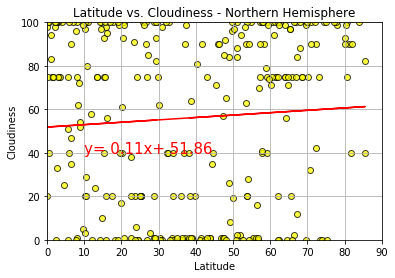

<Figure size 432x288 with 0 Axes>

In [30]:
#plt.scatter(x,y,other this and that)
x_axis = north_df["lat"]
data = north_df["Cloudiness"]
data = data.astype(float)

plt.scatter(x_axis,data,marker="o",facecolors="yellow",edgecolors="black", alpha=0.75)
# Generate latitudes(-90 to 90) 
plt.title("Latitude vs. Cloudiness - Northern Hemisphere")
plt.xlim(0,90)
plt.ylim(0,100)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
##add regression

## REGRESSION

(slope, intercept, rvalue, pvalue, stderr)=stats.linregress(x_axis,data)
regress_values = x_axis*slope+intercept
line_eq="y= "+ str(round(slope,2))+"x+ " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.show()
#save as png

plt.savefig("LatvsCloudNorth.png")

In [31]:
#ANALYSIS: The data set of cloudiness is incredibly varied, suggesting
#there is very little connection between latitude and cloud cover.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

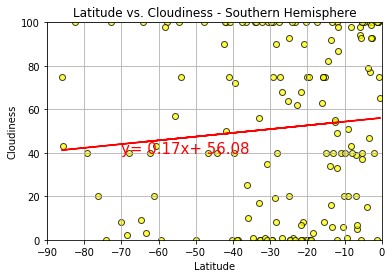

<Figure size 432x288 with 0 Axes>

In [32]:
#plt.scatter(x,y,other this and that)
x_axis = south_df["lat"]
data = south_df["Cloudiness"]
data = data.astype(float)

plt.scatter(x_axis,data,marker="o",facecolors="yellow",edgecolors="black", alpha=0.75)
# Generate latitudes(-90 to 90) 
plt.title("Latitude vs. Cloudiness - Southern Hemisphere")
plt.xlim(-90,0)
plt.ylim(0,100)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
##add regression

## REGRESSION

(slope, intercept, rvalue, pvalue, stderr)=stats.linregress(x_axis,data)
regress_values = x_axis*slope+intercept
line_eq="y= "+ str(round(slope,2))+"x+ " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-70,40),fontsize=15,color="red")
plt.show()

#save as png
plt.savefig("LatvsCloudSouth.png")

In [33]:
#ANALYSIS: The data set of cloudiness is incredibly varied, suggesting
#there is very little connection between latitude and cloud cover.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

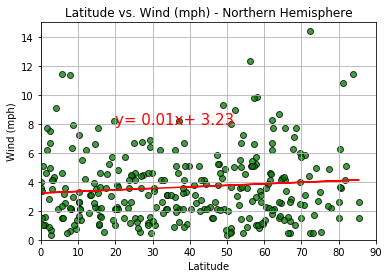

<Figure size 432x288 with 0 Axes>

In [34]:
#plt.scatter(x,y,other this and that)
x_axis = north_df["lat"]
data = north_df["Wind (mph)"]
data = data.astype(float)

plt.scatter(x_axis,data,marker="o",facecolors="green",edgecolors="black", alpha=0.75)
# Generate latitudes(-90 to 90) 
plt.title("Latitude vs. Wind (mph) - Northern Hemisphere")
plt.xlim(0,90)
plt.ylim(0,15)
plt.xlabel("Latitude")
plt.ylabel("Wind (mph)")
plt.grid(True)
##add regression

## REGRESSION

(slope, intercept, rvalue, pvalue, stderr)=stats.linregress(x_axis,data)
regress_values = x_axis*slope+intercept
line_eq="y= "+ str(round(slope,2))+"x+ " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(20,8),fontsize=15,color="red")
plt.show()

#save as png
plt.savefig("LatvsWindNorth.png")

In [35]:
#ANALYSIS: The data for wind speed at latitude does not have
#a very convincing regression line and suggests that there isn't much of a connection.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

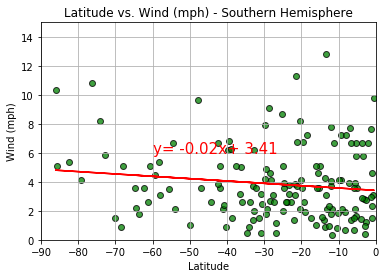

<Figure size 432x288 with 0 Axes>

In [36]:
#plt.scatter(x,y,other this and that)
x_axis = south_df["lat"]
data = south_df["Wind (mph)"]
data = data.astype(float)

plt.scatter(x_axis,data,marker="o",facecolors="green",edgecolors="black", alpha=0.75)
# Generate latitudes(-90 to 90) 
plt.title("Latitude vs. Wind (mph) - Southern Hemisphere")
plt.xlim(-90,0)
plt.ylim(0,15)
plt.xlabel("Latitude")
plt.ylabel("Wind (mph)")
plt.grid(True)

##add regression

## REGRESSION

(slope, intercept, rvalue, pvalue, stderr)=stats.linregress(x_axis,data)
regress_values = x_axis*slope+intercept
line_eq="y= "+ str(round(slope,2))+"x+ " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-60,6),fontsize=15,color="red")
plt.show()

#save as png
plt.savefig("LatvsWindSouth.png")

In [37]:
#ANALYSIS: The data for wind speed at latitude does not have
#a very convincing regression line and suggests that there isn't much of a connection.